# 24회차 기출


## 문제 1

**Data description**

-   **sex** : 성별(categorical data)

-   **age** : 나이

-   **pstatus** : 부모와의 동거 유무(T : 동거 o, A : 동거 x)(categorical data)

-   **medu** : 엄마의 교육수준(categorical data)

    -   0 : none

    -   1 : 초등교육(초등학교)

    -   2 : 5 \~ 9th edu

    -   3 : 중등교육(중학교, 고등학교)

    -   4 : 고등교육(대학, 대학원수준)

-   **fedu** : 아빠의 교육수준(categorical data)

    -   0 : none

    -   1 : 초등교육(초등학교)

    -   2 : 5 \~ 9th edu(5\~9학년)

    -   3 : 중등교육(중학교, 고등학교)

    -   4 : 고등교육(대학, 대학원수준)

-   **guardian** : 주보호자(categorical data)

    -   어머니

    -   아버지

    -   기타

-   **traveltime** : 등하교기간(categorical data)

    -   1 : 15분 이하

    -   2 : 15분 \~ 30분 이하

    -   3 : 30분 \~ 1시간 이하

    -   4 : 1시간 이상

-   **studytime** : 학습시간(categorical data)

    -   1 : 2시간 이하

    -   2 : 2\~5시간 이하

    -   3 : 5\~10시간 이하

    -   4 : 10시간 이상

-   **failure** : 학사경고 횟수

-   **freetime** : 자유시간(1 : 매우 낮음 \~ 5 : 매우 높음)(categorical data)

-   **famrel** : 가족관계(1 : 매우나쁨 \~ 5 : 매우우수)(categorical data)

In [71]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (5, 5)  # 가로 12인치, 세로 8인치
plt.rcParams["figure.dpi"] = 100  # 해상도도 조정 가능 (선택)

In [60]:
dat = pd.read_csv('problem1.csv')

In [61]:
print(dat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         395 non-null    object 
 1   age         395 non-null    int64  
 2   pstatus     395 non-null    object 
 3   medu        391 non-null    float64
 4   fedu        395 non-null    int64  
 5   guardian    395 non-null    object 
 6   traveltime  395 non-null    int64  
 7   studytime   395 non-null    int64  
 8   failures    395 non-null    int64  
 9   freetime    395 non-null    int64  
 10  famrel      395 non-null    int64  
 11  absences    389 non-null    float64
dtypes: float64(2), int64(7), object(3)
memory usage: 37.2+ KB
None


In [62]:
dat = dat.astype({'traveltime' : 'object', 'studytime' : 'object', 'freetime' : 'object', 'famrel' : 'object'})

1.  **탐색적 데이터 분석을 실시하시오. 논리적이고 타당한 근거를 들어 작성하시오(시각화 포함)(5점).**

In [63]:
dat.head(3)

,sex,age,pstatus,medu,fedu,guardian,traveltime,studytime,failures,freetime,famrel,absences
0,F,18,A,NaN,4,mother,2,2,0,3,4,6.0
1,F,17,T,NaN,1,father,1,2,0,3,5,4.0
2,F,15,T,NaN,1,mother,1,2,3,3,4,10.0


In [64]:
dat.isna().sum()

sex           0
age           0
pstatus       0
medu          4
fedu          0
guardian      0
traveltime    0
studytime     0
failures      0
freetime      0
famrel        0
absences      6
dtype: int64

medu, absences에 결측치가 존재한다.

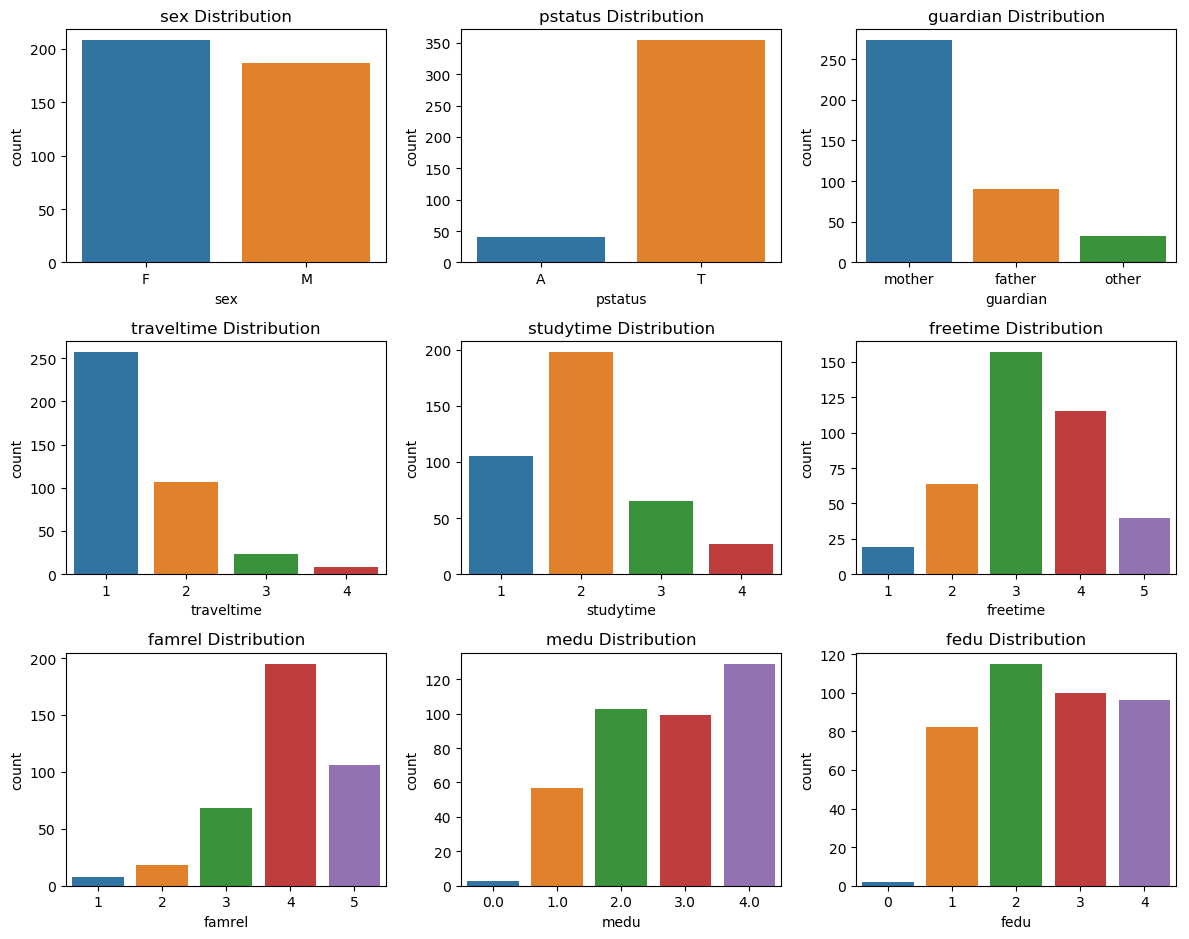

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# 성별, 부모동거여부, 주보호자, 등하교기간, 학습시간, 자유시간, 가족관계, 엄마 교육수준, 아빠 교육수준
categorical_columns = ['sex', 'pstatus', 'guardian', 'traveltime', 'studytime', 'freetime', 'famrel', 'medu', 'fedu']

fig, axes = plt.subplots(3, 3, figsize=(12, 10));

for i, col in enumerate(categorical_columns):
    row = i // 3  # 행 계산
    col_position = i % 3  # 열 계산
    sns.countplot(data=dat, x=col, ax=axes[row, col_position]);
    axes[row, col_position].set_title(f'{col} Distribution');

for j in range(i+1, 9):
    fig.delaxes(axes[j//3, j%3]);

plt.tight_layout(rect=[0, 0, 1, 0.95]); 
plt.show();

아빠의 교육수준(fedu), 엄마의 교육수준(medu), 가족관계(famrel), 등하교시간(traveltime)의 경우 특정 빈도가 매우 작으므로, class 불균형이 의심된다.

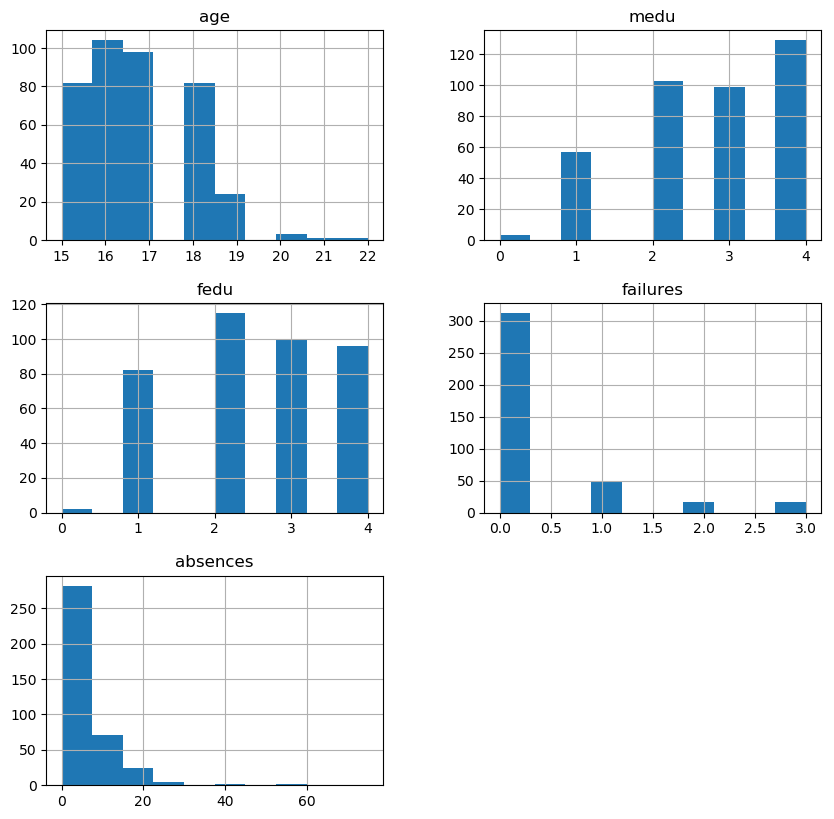

In [78]:
dat.hist(figsize=(10, 10));
plt.show();

결석횟수(absences)의 경우 우측으로 긴꼬리를 갖는 분포로 보이며, 40회 이상인 이상치가 존재한다. 나이(age)의 경우 15\~19세가 가장 많고, 20세 이상인 경우도 존재한다. 학사경고횟수(failures)의 경우 0회가 가장 많고, 1\~3회가 순이다.

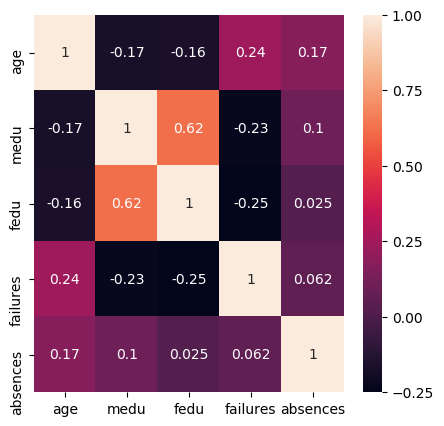

In [79]:
corr = dat.select_dtypes('number').corr()
sns.heatmap(corr, annot = True);
plt.show();

(fedu, medu)의 경우 상관계수 = 0.62로 양의 상관관계가 존재한다. 그 외 변수의 경우 유의미한 상관관계가 존재하지 않는다.

2.  **데이터를 전처리 하는 과정을 거치시오. 데이터 전처리를 통해 향후 예측분석에 미칠 영향을 논리적이고 타당한 근거를 들어 제시하시오(시각화 포함)(5점).**

In [80]:
dat = dat.dropna(subset = ['absences'])

결석 횟수(absences)의 경우 1.52% 정도 결측치가 존재하므로, 결측치를 삭제한다.

In [81]:
y = dat.absences
X = dat.drop(['absences'], axis = 1)
cat_columns = X.select_dtypes('object').columns

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [82]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline

impute_preprocess = make_pipeline(
    KNNImputer()
)
encoding_preprocess = make_pipeline(
    OneHotEncoder(handle_unknown="ignore", sparse=False)
)

preprocess = ColumnTransformer(
    [("imputation", impute_preprocess, ['medu']), 
     ("cat", encoding_preprocess, cat_columns)], 
     remainder='passthrough'
)

**결측치 대치**

-   범주형 변수인 medu의 경우 knn을 이용해서 결측치를 대치함

knn을 이용한 대치법은 k개의 이웃을 택한 후, 이웃 중 가장 빈도가 높은 범주에 대해서 결측치를 대치하는 방법이다. knn을 이용해서 결측치를 대치한 이유는 대표값을 이용하는 방법에 비해서 다른 변수의 정보를 이용해서 결측치를 대치할 수 있기 때문에 더 많은 정보를 활용해서 결측치를 대치할 수 있기 때문이다.


-   범주형 변수 인코딩

범주형 변수에 대해 원핫인코딩을 진행한다.

3.  **데이터 전처리를 진행하는데 시간이 부족하여 수행하지 못한 전처리 기법과 수행 방법을 제시하고, 향후 예측분석에 미칠 영향을 논리적이고 타당한 근거를 들어 제시하시오(5점).**

범주형 변수의 class가 많을 경우, 범주형 변수 인코딩 시 차원이 늘어나는 문제가 있다. 이에 따라 모형 적합시 속도가 느려지는 단점이 있다. 따라서 의미가 퇴색되지 않는 선에서 각 범주형 변수의 class의 빈도가 너무 적을 경우 병합시키는 것이 적절할 것이다.

In [83]:
freq = train_X['famrel'].value_counts(normalize = True)
prob_columns = train_X['famrel'].map(freq)
train_X['famrel'] = train_X['famrel'].mask(prob_columns < 0.1, 'other')
train_X['famrel'].value_counts()
test_X['famrel'] = np.where(test_X['famrel'].isin([1, 2]), 'other', test_X['famrel'])
test_X['famrel'].value_counts()
train_X['famrel'] = train_X['famrel'].astype(str)
test_X['famrel'] = test_X['famrel'].astype(str)

4.  **전처리가 완료된 데이터를 활용하여 예측 분석에 적합한 알고리즘을 3개 이상 추천하고, 이들 중 2개를 선정하여 이를 선정한 이유를 타당한 근거를 들어 제시하시오(5점).**

-   Decision tree

Decision tree는 나무구조를 활용한 의사결정 규칙을 통해서 분류 혹은 예측을 수행하는 방법이다. 범주형 변수의 경우 gini index, cross entropy, 연속형 변수의 경우 SSE를 활용하여, 데이터에 맞는 적절한 분할 기준을 구축하여 의사결정나무를 생성한다. 단일의사결정나무의 경우 시각화를 통해 해석의 장점이 있다.

-   random forest

Random forest는 Bagging을 의사결정나무에 적용하여 의사결정나무의 단점인 예측력의 분산이 큰 단점을 보완한 모형이다. Decision tree과 성능 비교를 위해 활용한다.

-   XGBOOST

Gradient Boosting 알고리즘을 기반으로 한 모델로 여러 개의 약한 예측 모델(주로 결정 트리)을 순차적으로 결합하여 강력한 예측 모델을 만드는 앙상블 기법이다. XGBOOST는 Gradient Boosting 알고리즘에서 더 나아가 특히, 대규모 데이터셋에 대해 빠른 학습을 지원하고, 과적합을 방지하는 다양한 기법을 제공한다.

Decision Tree는 데이터 해석에 강점이 있고, Random Forest는 예측 성능이 뛰어나고 과적합 문제를 해결할 수 있는 안정적인 앙상블 기법이므로 두 알고리즘을 선택한다.

5.  **예측분석을 적용하여 평가할 때의 평가 지표를 선정하고 평가 지표를 선정한 이유를 논리적이고 타당한 근거를 들어 제시하시오(5점).**

EDA 결과 absences에 이상치로 의심되는 케이스가 존재한다. 따라서 RMSE에 비해 이상치에 비교적 강건한 MAE를 평가 지표로 선택한다.

6.  **선정한 2개의 알고리즘을 바탕으로 분석을 진행하고, 이를 선정한 평가지표와 함께 나타내시오(시각화 포함)(5점).**

델 튜닝은 파라미터의 범위를 제한하여 진행하였으며, 반복 5-fold 교차검증을 통해 validation 데이터를 여러번 생성 후 적합하여, 하이퍼파라미터별 모형 성능을 교차 검증하였다.

In [84]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, KFold

cat_columns = train_X.select_dtypes('object').columns

impute_preprocess = make_pipeline(
    IterativeImputer(estimator = RandomForestRegressor(), max_iter = 5)
)
encoding_preprocess = make_pipeline(
    OneHotEncoder(handle_unknown="ignore", sparse=False)
)

preprocess = ColumnTransformer(
    [("imputation", impute_preprocess, ['medu']), 
     ("cat", encoding_preprocess, cat_columns)], 
     remainder='passthrough'
)

In [34]:
from sklearn.tree import DecisionTreeRegressor
full_pipe1 = Pipeline(
    [
        ("preprocess", preprocess),
        ("regressor", DecisionTreeRegressor())
    ]
)

decisiontree_param = {'regressor__ccp_alpha': np.arange(0.1, 1, 0.1)}
cv = KFold(n_splits = 5, shuffle = True, random_state = 0)

decisiontree_search = GridSearchCV(estimator = full_pipe1, 
                      param_grid = decisiontree_param, 
                      cv = cv,
                      #cv = 5, # KFold 5
                      scoring = 'neg_mean_absolute_error')
decisiontree_search.fit(train_X, train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('imputation',
                                                                         Pipeline(steps=[('iterativeimputer',
                                                                                          IterativeImputer(estimator=RandomForestRegressor(),
                                                                                                           max_iter=5))]),
                                                                         ['medu']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                 

In [85]:
print('decision tree best score : ', -decisiontree_search.best_score_)

decision tree best score :  5.886733615355975


ccp_alpha = 0.9일 때, MAE가 가장 작다.

In [86]:
full_pipe2 = Pipeline(
    [
        ("preprocess", preprocess),
        ("regressor", RandomForestRegressor())
    ]
)

RandomForest_param = {'regressor__max_features': np.arange(0.5, 1, 0.1)}
cv = KFold(n_splits = 5, shuffle = True, random_state = 0)

RandomForest_search = GridSearchCV(estimator = full_pipe2, 
                      param_grid = RandomForest_param, 
                      cv = cv,
                      #cv = 5, # KFold 5
                      scoring = 'neg_mean_absolute_error')
RandomForest_search.fit(train_X, train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('imputation',
                                                                         Pipeline(steps=[('iterativeimputer',
                                                                                          IterativeImputer(estimator=RandomForestRegressor(),
                                                                                                           max_iter=5))]),
                                                                         ['medu']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                 

In [87]:
print('Random Forest best score : ', -RandomForest_search.best_score_)

Random Forest best score :  5.627017003367003


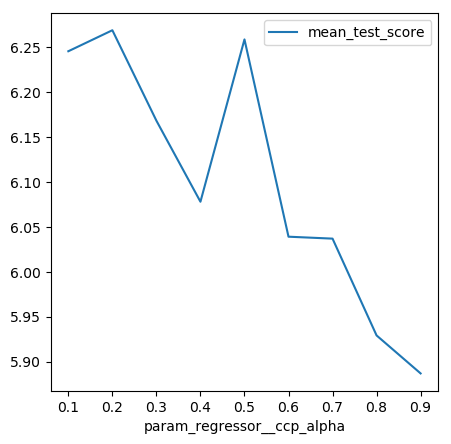

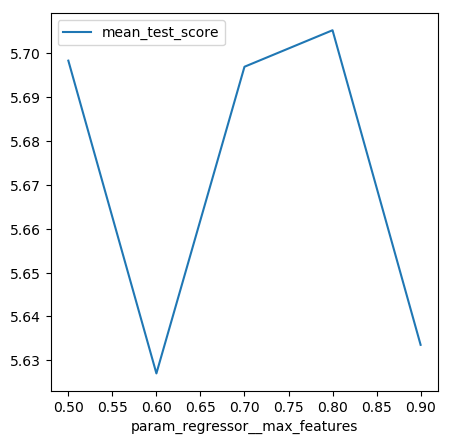

In [88]:
cv_result1 = pd.DataFrame(decisiontree_search.cv_results_)
cv_result2 = pd.DataFrame(RandomForest_search.cv_results_)

cv_result1['mean_test_score'] = np.absolute(cv_result1['mean_test_score'])
cv_result2['mean_test_score'] = np.absolute(cv_result2['mean_test_score'])

cv_result1.plot(x = 'param_regressor__ccp_alpha', y = 'mean_test_score')
plt.show();

cv_result2.plot(x = 'param_regressor__max_features', y = 'mean_test_score')
plt.show();

decision tree의 경우 ccp_alpha = 0.9일 때, MAE가 가장 작다. random forest의 경우 max_features = 0.5일 때, MAE가 가장 작다. 


교차검증 결과를 바탕으로 Random forest 모형을 선택한다. 최종 검증 데이터에 적용했을 때 성능은 다음과 같다.

In [89]:
print('테스트 MAE score :', np.absolute(RandomForest_search.score(test_X, test_y)))

테스트 MAE score : 5.23366096866097


7.  **위에서 구축한 모델의 일반화 가능성에 대해서 논리적으로 타당한 근거를 바탕으로 제시하시오(5점).**

In [90]:
pred = RandomForest_search.predict(test_X)
np.corrcoef(pred, test_y)[0,1]

0.27418700594868006

훈련 데이터와 테스트 데이터를 묶은 전체 데이터셋에서 일반화 성능 확인을 위해 임의의 테스트셋을 랜덤샘플로 1000번 뽑는다. 그리고, 튜닝이 완료된 Random forest 모델에 테스트셋을 적용한다. 테스트셋의 예측값과 실제값의 상관관계를 측정한다. 1000번 계산한 상관관계의 분포를 확인해보면 다음과 같다.

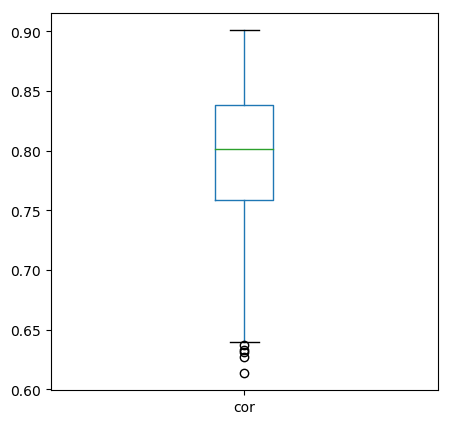

In [91]:
train = pd.concat([train_X, train_y], axis = 1)
test = pd.concat([test_X, test_y], axis = 1)

all_dat = pd.concat([train, test], axis = 0)

N = 1000
cor_result = []
for i in range(1, N):
    sub_dat = all_dat.sample(frac=0.6,random_state=i)
    pred = RandomForest_search.predict(sub_dat)
    cor_result.append(np.corrcoef(pred, sub_dat['absences'])[0,1])
    
result = pd.DataFrame(cor_result, columns = ['cor'])
result.plot(kind = 'box')
plt.show();

대체로 0.7 ~ 0.8 사이에 분포되어 있으므로, 높은 상관관계가 존재한다고 볼 수 있다. 따라서 구축된 모델은 일반화가 가능하다. 

8.  **앞서 구축한 모델을 더욱 발전시키기 위한 방법을 서술하고 그 방법이 모델에 어떤 영향을 미칠 수 있는지를 타당한 근거를 들어 제시하시오(5점).**

반복 5-폴드 교차검증의 경우 모델 적합시 시간이 오래걸리는 단점이 있다. 변수 선택 방법을 활용하여 예측에 필요한 변수를 뽑고, 속도와 성능 측면에서 모델 성능을 개선해볼 수 있다. 변수 선택 방법으로는 Recursive Feature Elimination 방법을 활용한다.

변수 중요도가 낮은 변수를 하나씩 제거해나가면서 모델의 성능과 비교 후 예측에 유의미한 변수를 선택하는 방식이다.

In [42]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import RandomizedSearchCV

full_pipe1_1 = Pipeline(
    [
        ("preprocess", preprocess),
        ('feat_sel', RFE(estimator=RandomForestRegressor(), step=1)),
        ("regressor", RandomForestRegressor())
    ]
)       

RandomForest_search_param2 = {
                       'feat_sel__n_features_to_select': [4,5,6,7,8,9,10], 
                       'regressor__max_features': np.arange(0.5, 1, 0.1)
                      }
# 
# search = RandomizedSearchCV(estimator=pipe,
#                             param_distributions=decisiontree_param2, ...)
# search.fit(X, y)

RandomForest_search2 = GridSearchCV(estimator = full_pipe1_1, 
                      param_grid = RandomForest_search_param2, 
                      cv = cv,
                      scoring = 'neg_mean_absolute_error')
RandomForest_search2.fit(train_X, train_y)
RandomForest_search2.best_params_
print('테스트 MAE score :', np.absolute(RandomForest_search2.score(test_X, test_y)))

테스트 MAE score : 5.701237382987384


변수가 4개일 때, MAE = 5.43로 가장 낮으며, 전체 변수를 고려한 모델과 모델 성능 차이가 없으므로, RFE로 선택된 변수 4개를 최종 모델로 활용할 수 있다.

## 문제 2

야생 동물 생물학자들은 국립 공원에서 어부들이 얼마나 많은 물고기를 잡는지 모델링하고자 합니다.

**Data description**

-   camper : 캠핑카를 가져왔는지 여부

-   persons : 그룹에 속한 사람의 수

-   child : 그룹에 속한 어린이 수

-   count : 그룹에서 잡은 물고기의 수

In [43]:
dat = pd.read_csv('problem2.csv')

In [44]:
print(dat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nofish    250 non-null    int64  
 1   livebait  250 non-null    int64  
 2   camper    250 non-null    int64  
 3   persons   250 non-null    int64  
 4   child     250 non-null    int64  
 5   xb        250 non-null    float64
 6   zg        250 non-null    float64
 7   count     250 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 15.8 KB
None


In [45]:
dat = dat.drop(columns=['nofish'])
dat['livebait'] = dat['livebait'].astype('category')
dat['camper'] = dat['camper'].astype('category')

1.  **데이터에 과대산포가 존재하는지 판단하시오(5점).**

In [46]:
mean_count = np.mean(dat['count'])
var_count = np.var(dat['count'])
overdispersion_factor = var_count / mean_count
print(f'과대산포 판단 (분산/평균): {overdispersion_factor}')

과대산포 판단 (분산/평균): 40.90788349514564


평균에 비해 분산이 약 7배 높으므로, 과대산포 되어있다.

2.  **과대산포를 반영한 회귀 모델을 적합하시오(5점).**

In [47]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
nb_model = smf.glm('count ~ persons + child + livebait + camper', data=dat, 
                   family=sm.families.NegativeBinomial()).fit()

print(nb_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  count   No. Observations:                  250
Model:                            GLM   Df Residuals:                      245
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -407.32
Date:                Fri, 23 May 2025   Deviance:                       296.30
Time:                        21:50:41   Pearson chi2:                     761.
No. Iterations:                     8   Pseudo R-squ. (CS):             0.7543
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.9863      0.406     -7.358

3.  **Zero-inflation 모델을 적합하고, 모델 적합도를 통계적으로 검정하시오(5점).**

-   귀무가설: 모든 계수들이 0이다.

-   대립가설: 0이 아닌 계수가 존재한다.

In [48]:
from statsmodels.discrete.count_model import ZeroInflatedNegativeBinomialP

# Zero-inflation 모델 적합
zi_model = ZeroInflatedNegativeBinomialP.from_formula(
    'count ~ persons + child + livebait + camper', 
    data=dat, 
    dist='negbin'
).fit()

         Current function value: 1.594368
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


In [49]:
zi_model = ZeroInflatedNegativeBinomialP.from_formula('count ~ persons + child + livebait + camper', data=dat, dist='negbin').fit()

llf = zi_model.llf

null_model = ZeroInflatedNegativeBinomialP.from_formula('count ~ 1', data=dat, dist='negbin').fit()
llnull = null_model.llf


test_statistic = round(-2 * (llnull - llf), 3)
print(f"검정 통계량: {test_statistic}")
df = zi_model.df_model - null_model.df_model

from scipy.stats import chi2
p_value = chi2.sf(test_statistic, df)
print(f"p-value: {p_value:.10f}")

         Current function value: 1.594368
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 1.857757
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
검정 통계량: 131.695
p-value: 0.0000000000


유의수준 5%에서 p-value = 0이므로 귀무가설을 기각합니다. 따라서 0이 아닌 계수가 존재하며, 모델이 데이터에 적합하다고 결론지을 수 있습니다.

4.  **2번과 3번 모델을 비교한 후 어떤 모델이 해당 데이터에 더 적합한지 판단하시오(5점).**

In [50]:
aic_nb = nb_model.aic
aic_zi = zi_model.aic
print(aic_nb, aic_zi)

824.6321438245659 807.1839079028805


음이항 회귀 모델에 비해 Zero-inflation 음이항 회귀 모델의 AIC가 작으므로, Zero-inflation 음이항 회귀 모델이 해당 데이터에 더 적합하다.

## 문제 3

In [51]:
dat = pd.read_csv('problem3.csv', encoding='cp949')

1.  **회귀식이 통계적으로 유의한지 판단하시오(5점).**

In [52]:
fit = smf.ols(formula='매출액 ~ C(광고비) + 매출액', data=dat).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    매출액   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.910e+30
Date:                Fri, 23 May 2025   Prob (F-statistic):          3.57e-120
Time:                        21:50:41   Log-Likelihood:                 344.13
No. Observations:                  11   AIC:                            -682.3
Df Residuals:                       8   BIC:                            -681.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.599e-14   9.59e-15      1.667   

-   귀무가설 : 모든 회귀계수는 0이다.

-   대립가설 : 적어도 하나의 회귀계수는 0이 아니다.

유의수준 5%에서 p-value = 5.88e-119로 작으므로, 귀무가설을 기각한다. 따라서 적어도 하나의 회귀계수는 0이 아니다.

2.  **광고비 변수를 가변수 처리후 다중회귀를 수행하여 회귀계수가 통계적으로 유의한지 검정하시오(5점).**

-   귀무가설 : 해당 회귀계수는 0이다.

-   대립가설 : 해당 회귀계수는 0이 아니다.

광고횟수의 경우 유의수준 5%에서 p-value = 0.000로 작으므로, 귀무가설을 기각한다. 따라서 광고횟수는 매출액과 통계적으로 유의미한 관계가 있다.

광공비의 경우 유의수준 5%에서 p-value = 0.956로 크므로, 귀무가설을 기각할 수 없다. 따라서 광고비는 매출액과 통계적으로 유의미한 관계가 없다.

## 문제 4

A 생산라인의 제품 평균은 5.7mm이고 표준편차는 0.03입니다. B 생산라인의 제품 평균은 5.6mm이고 표준편차는 0.04입니다. 두 생산라인의 제품 평균이 서로 다른지 검정하려고 합니다. 주어진 정보를 바탕으로 5% 유의수준에서 Z-검정을 수행하세요. (Z(0.05) = 1.65)

1.  **두 생산라인의 평균이 동일한지 여부를 검정하기 위한 귀무가설과 대립가설을 세우시오(5점).**

-   귀무가설(H₀): A 생산라인과 B 생산라인의 평균은 동일하다.

-   대립가설(H₁): A 생산라인의 평균이 B 생산라인의 평균보다 크다.

2.  **두 생산라인의 평균 제품 크기가 통계적으로 유의미하게 차이가 있는지 검정하시오(5점).**

In [53]:
mu_A = 5.7  
mu_B = 5.6  
sigma_A = 0.03  
sigma_B = 0.04  
n_A = 30  
n_B = 30  

Z = (mu_A - mu_B) / np.sqrt((sigma_A**2 / n_A) + (sigma_B**2 / n_B))
Z_critical = 1.65  

print(f"계산된 Z 값: {Z}")
print(f"임계 Z 값: {Z_critical}")

계산된 Z 값: 10.954451150103381
임계 Z 값: 1.65


유의수준 5%에서 임계값은 1.65이고, 검정통계량은 10.95로 크므로, 귀무가설을 기각한다. 따라서 A 생산라인의 평균이 B 생산라인의 평균보다 크다.

## 문제 5

다음은 특정 바이러스에 대한 검사 결과를 나타내는 분류표입니다. 이 표를 사용하여 베이지안 방법을 적용하여 양성으로 예측된 사람이 실제로 양성일 확률을 계산하세요(10점).

|            | 양성(실제) | 음성(실제) |
|------------|------------|------------|
| 양성(예측) | 370        | 10         |
| 음성(예측) | 15         | 690        |

In [54]:
true_positive = 370  # 양성(실제) 중 양성(예측)
false_positive = 10   # 음성(실제) 중 양성(예측)
true_negative = 690   # 음성(실제) 중 음성(예측)
false_negative = 15   # 양성(실제) 중 음성(예측)

total = true_positive + false_positive + true_negative + false_negative
predicted_positive = true_positive + false_positive
actual_positive = true_positive + false_negative
P_actual_positive_given_predicted_positive = true_positive / predicted_positive

print(f"양성으로 예측된 사람이 실제로 양성일 확률: {P_actual_positive_given_predicted_positive}")

양성으로 예측된 사람이 실제로 양성일 확률: 0.9736842105263158


## 문제 6

다음은 정규분포에서 추출한 데이터입니다. 해당 데이터를 사용하여 신뢰구간을 계산하세요.

In [55]:
dat = pd.read_csv('problem6.csv')

1.  **모분산을 모르는 경우, 주어진 데이터를 사용하여 95% 신뢰구간을 T 분포를 이용해 계산하시오(5점).**

In [56]:
from scipy import stats
n = len(dat)
mean_data = np.mean(dat)
sd_data = np.std(dat, ddof=1)

alpha = 0.05
t_value = stats.t.ppf(1 - alpha/2, df=n-1)
margin_of_error_t = t_value * (sd_data / np.sqrt(n))
lower_bound_t = mean_data - margin_of_error_t
upper_bound_t = mean_data + margin_of_error_t

print(f"T-분포를 이용한 95% 신뢰구간: [{lower_bound_t}, {upper_bound_t}]")

T-분포를 이용한 95% 신뢰구간: [x    2.957381
dtype: float64, x    3.06906
dtype: float64]


2.  **모표준편차가 0.1인 것을 알고 있을 때, Z 분포를 이용하여 주어진 데이터의 95% 신뢰구간을 구하시오(5점).**

In [57]:
sigma = 0.1
z_value = stats.norm.ppf(1 - alpha/2)
margin_of_error_z = z_value * (sigma / np.sqrt(n))
lower_bound_z = mean_data - margin_of_error_z
upper_bound_z = mean_data + margin_of_error_z

print(f"Z-분포를 이용한 95% 신뢰구간: [{lower_bound_z}, {upper_bound_z}]")

Z-분포를 이용한 95% 신뢰구간: [x    2.951241
dtype: float64, x    3.0752
dtype: float64]


In [1]:
!pip install koreanize_matplotlib -q